In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Qusetion (1) (a)

In [2]:
df = pd.read_csv('../data/diagnosis.data', sep='\t', header=None, decimal=',', encoding='utf-16')
df.head()

,0,1,2,3,4,5,6,7
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       120 non-null    float64
 1   1       120 non-null    object 
 2   2       120 non-null    object 
 3   3       120 non-null    object 
 4   4       120 non-null    object 
 5   5       120 non-null    object 
 6   6       120 non-null    object 
 7   7       120 non-null    object 
dtypes: float64(1), object(7)
memory usage: 7.6+ KB


# Question (1) (b)

In [4]:
df = df.replace('yes', 1).replace('no', 0)

X = df.iloc[:, :6]
y = df.iloc[:, 6:]
y1 = df.iloc[:, 6]
y2 = df.iloc[:, 7]

# print(X)
# print(y)

[Text(0.4, 0.9, 'X[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.2, 0.7, 'X[3] <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.6, 0.7, 'X[2] <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7, 0.5, 'X[1] <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(0.8, 0.3, 'X[3] <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [[0, 19]\n[0, 19]]')]

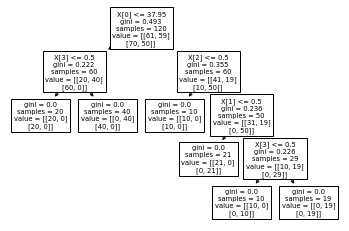

In [5]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf)

[Text(0.4, 0.875, 'X[3] <= 0.5\ngini = 0.5\nsamples = 120\nvalue = [61, 59]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0]'),
 Text(0.6, 0.625, 'X[4] <= 0.5\ngini = 0.387\nsamples = 80\nvalue = [21, 59]'),
 Text(0.4, 0.375, 'X[2] <= 0.5\ngini = 0.437\nsamples = 31\nvalue = [21, 10]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 49\nvalue = [0, 49]')]

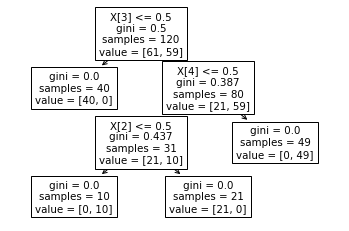

In [6]:
dt1 = tree.DecisionTreeClassifier()
dt1 = dt1.fit(X, y1)
tree.plot_tree(dt1)

[Text(0.4, 0.8333333333333334, 'X[0] <= 37.95\ngini = 0.486\nsamples = 120\nvalue = [70, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 60\nvalue = [60, 0]'),
 Text(0.6, 0.5, 'X[2] <= 0.5\ngini = 0.278\nsamples = 60\nvalue = [10, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 50\nvalue = [0, 50]')]

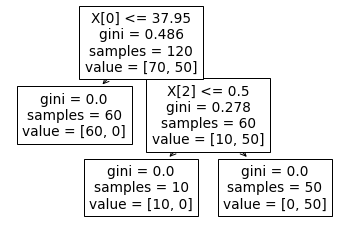

In [7]:
dt2 = tree.DecisionTreeClassifier()
dt2 = dt2.fit(X, y2)
tree.plot_tree(dt2)

# Question (1) (c)

In [8]:
r = tree.export_text(clf)
print(r)

|--- feature_0 <= 37.95
|   |--- feature_3 <= 0.50
|   |   |--- class: 0
|   |--- feature_3 >  0.50
|   |   |--- class: 1
|--- feature_0 >  37.95
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  0.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 0



# Question (1) (d)

CCP_Alphas: [0.         0.04908333 0.07947222 0.11111111 0.20423611]
Scores: [1.0, 0.8416666666666667, 0.7583333333333333, 0.5916666666666667, 0.25]


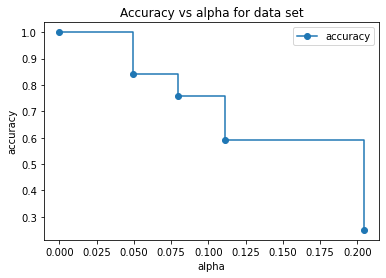

In [9]:
path = clf.cost_complexity_pruning_path(X, y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print('CCP_Alphas:', ccp_alphas)

clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X, y)
    clfs.append(clf)
    
scores = [clf.score(X, y) for clf in clfs]
print('Scores:', scores)

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for data set")
ax.plot(ccp_alphas, scores, marker="o", label="accuracy", drawstyle="steps-post")
ax.legend()
plt.show()

After discussing with the TA's and showing my work in office hours, it seems that the ccp_alpha that provides the highest accuracy decision tree is when ccp_alpha = 0. I believe one of the main reasons for this is because I did not split up my data into training/testing but rather built a tree and classified from the entire data set. If I had split up my data, it would be more likely that a ccp_alpha value > 0 would provide higher accuracy for the testing data which I would have then chosen as the ccp_alpha value to use when creating the new cost-complexity pruned tree. Because the highest accuracy was when ccp_alpha = 0, this is the same as default when building my original tree, so nothing changes.

# Question (2) (a)

In [10]:
df = pd.read_csv('../data/communities.data', sep=',', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 128 entries, 0 to 127
dtypes: float64(100), int64(2), object(26)
memory usage: 1.9+ MB


# Question (2) (b)

In [12]:
# data imputation, replace NaN with mean
# ignore 5 non-predictive features

from sklearn.impute import SimpleImputer
df = df.replace('?', np.NaN)
df = df.drop(columns=[0, 1, 2, 3, 4])
imp_mean = SimpleImputer()
imp_mean.fit(df)
df = pd.DataFrame(imp_mean.transform(df))
# df.head()

# Question (2) (a) (continued)

In [13]:
X_train = df.iloc[:1495, :122]
X_test = df.iloc[1495:, :122]
y_train = df.iloc[:1495, 122]
y_test = df.iloc[1495:, 122]

# print(X_train)
# print(X_test)
# print(y_train)
# print(y_test)

# Question (2) (c)

In [14]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,117,118,119,120,121,122
0,1.000000,-0.046148,0.231178,-0.300845,0.181603,0.156218,0.006368,0.130344,0.075596,-0.102006,...,0.713652,0.231897,0.270356,0.609147,0.595543,-0.061583,0.076527,0.466352,-0.035576,0.367157
1,-0.046148,1.000000,-0.067109,-0.235907,0.201996,0.468659,0.520461,0.367338,0.295225,-0.612666,...,-0.015078,-0.004072,-0.051506,-0.032663,-0.007584,-0.006426,-0.000280,-0.094368,-0.054562,-0.034923
2,0.231178,-0.067109,1.000000,-0.794389,-0.106738,-0.066581,0.122338,0.153475,0.134068,0.052934,...,0.149758,0.095053,0.147023,0.122017,0.083179,-0.082660,0.010987,0.260793,0.022237,0.631264
3,-0.300845,-0.235907,-0.794389,1.000000,-0.270266,-0.444166,-0.194015,-0.266852,-0.183804,0.136483,...,-0.131389,-0.337458,-0.215636,-0.109191,-0.114860,0.052940,-0.033209,-0.276234,-0.006323,-0.684770
4,0.181603,0.201996,-0.106738,-0.270266,1.000000,0.266743,-0.025020,0.100727,0.052761,-0.272020,...,-0.001084,0.389944,0.296921,-0.017992,0.067745,0.032389,0.065424,0.101888,-0.011619,0.037622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,-0.061583,-0.006426,-0.082660,0.052940,0.032389,0.024366,0.000652,0.013327,0.013687,0.005601,...,-0.067678,0.055734,0.023457,-0.115349,-0.089736,1.000000,0.007179,0.021153,-0.237240,-0.039002
119,0.076527,-0.000280,0.010987,-0.033209,0.065424,0.025956,0.011271,0.005145,-0.001001,-0.042756,...,0.109830,-0.076634,-0.082946,0.078436,0.023349,0.007179,1.000000,-0.015712,-0.021100,0.055038
120,0.466352,-0.094368,0.260793,-0.276234,0.101888,0.125353,0.001301,0.117290,0.083180,-0.010168,...,0.299632,0.228084,0.206644,-0.052426,-0.062677,0.021153,-0.015712,1.000000,0.018649,0.348627
121,-0.035576,-0.054562,0.022237,-0.006323,-0.011619,0.002234,-0.076589,-0.068575,-0.049876,0.076586,...,-0.113166,0.067199,0.080024,0.245532,0.259342,-0.237240,-0.021100,0.018649,1.000000,0.045466


# Question (2) (d)

In [15]:
from scipy.stats import variation
cv_values = variation(df)
print(cv_values)

[2.20294993 0.3532097  1.41056656 0.32370036 1.35882134 1.61387296
 0.36574812 0.29061999 0.49503634 0.42333552 2.00124163 0.63868866
 0.579608   0.32762787 0.69985456 0.35914986 0.36842021 0.6988552
 0.3495514  0.52759954 0.54549659 0.5074249  0.58932117 0.80948203
 0.60604183 0.67047639 0.47384086 2.30439167 0.75379109 0.67543079
 0.52815378 0.57825579 0.55599333 0.34724014 0.5104523  0.39812581
 0.5083338  0.422      0.39548416 0.40371035 0.3591826  0.371375
 0.31687526 0.33052823 0.3323925  0.32934323 0.32846855 0.33616412
 0.33263868 2.99344555 0.91957222 2.89976977 0.6840295  0.58474358
 0.50478324 0.45555177 1.29977426 1.29730638 1.28091166 1.28371176
 0.28860078 1.45870069 0.73435052 0.75691886 0.36682182 0.31932719
 0.46833631 0.3502283  1.1269169  0.34828327 0.81068443 1.9582885
 0.26957935 0.33745632 1.0644754  0.43600961 0.47029345 0.91798069
 0.84853101 0.84766758 0.87852946 0.8745136  0.63302762 0.56174345
 0.58686703 0.55545314 0.34574279 0.41628674 0.47681363 3.48460717

# Question (2) (e)

In [16]:
highest_cv_indices = np.argpartition(cv_values, -11)[-11:]
print('Highest CV Indices:\n', highest_cv_indices)
print('Highest CV Values:\n', cv_values[highest_cv_indices])

Highest CV Indices:
 [  5 113  71  10  51   0  27 120  49  89  90]
Highest CV Values:
 [1.61387296 1.67761065 1.9582885  2.00124163 2.89976977 2.20294993
 2.30439167 2.55462518 2.99344555 3.48460717 4.40659706]


In [17]:
cv_df = df[np.append(highest_cv_indices, 122)]
cv_df.head()

,5,113,71,10,51,0,27,120,49,89,90,122
0,0.17,0.12,0.21,0.20,0.03,0.19,0.08,0.32,0.04,0.04,0.0,0.20
1,0.07,0.02,0.02,0.02,0.01,0.00,0.01,0.00,0.00,0.00,0.0,0.67
2,0.04,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.0,0.43
3,0.10,0.02,0.01,0.06,0.02,0.04,0.01,0.00,0.03,0.00,0.0,0.12
4,0.05,0.04,0.01,0.02,0.00,0.01,0.00,0.00,0.00,0.00,0.0,0.03


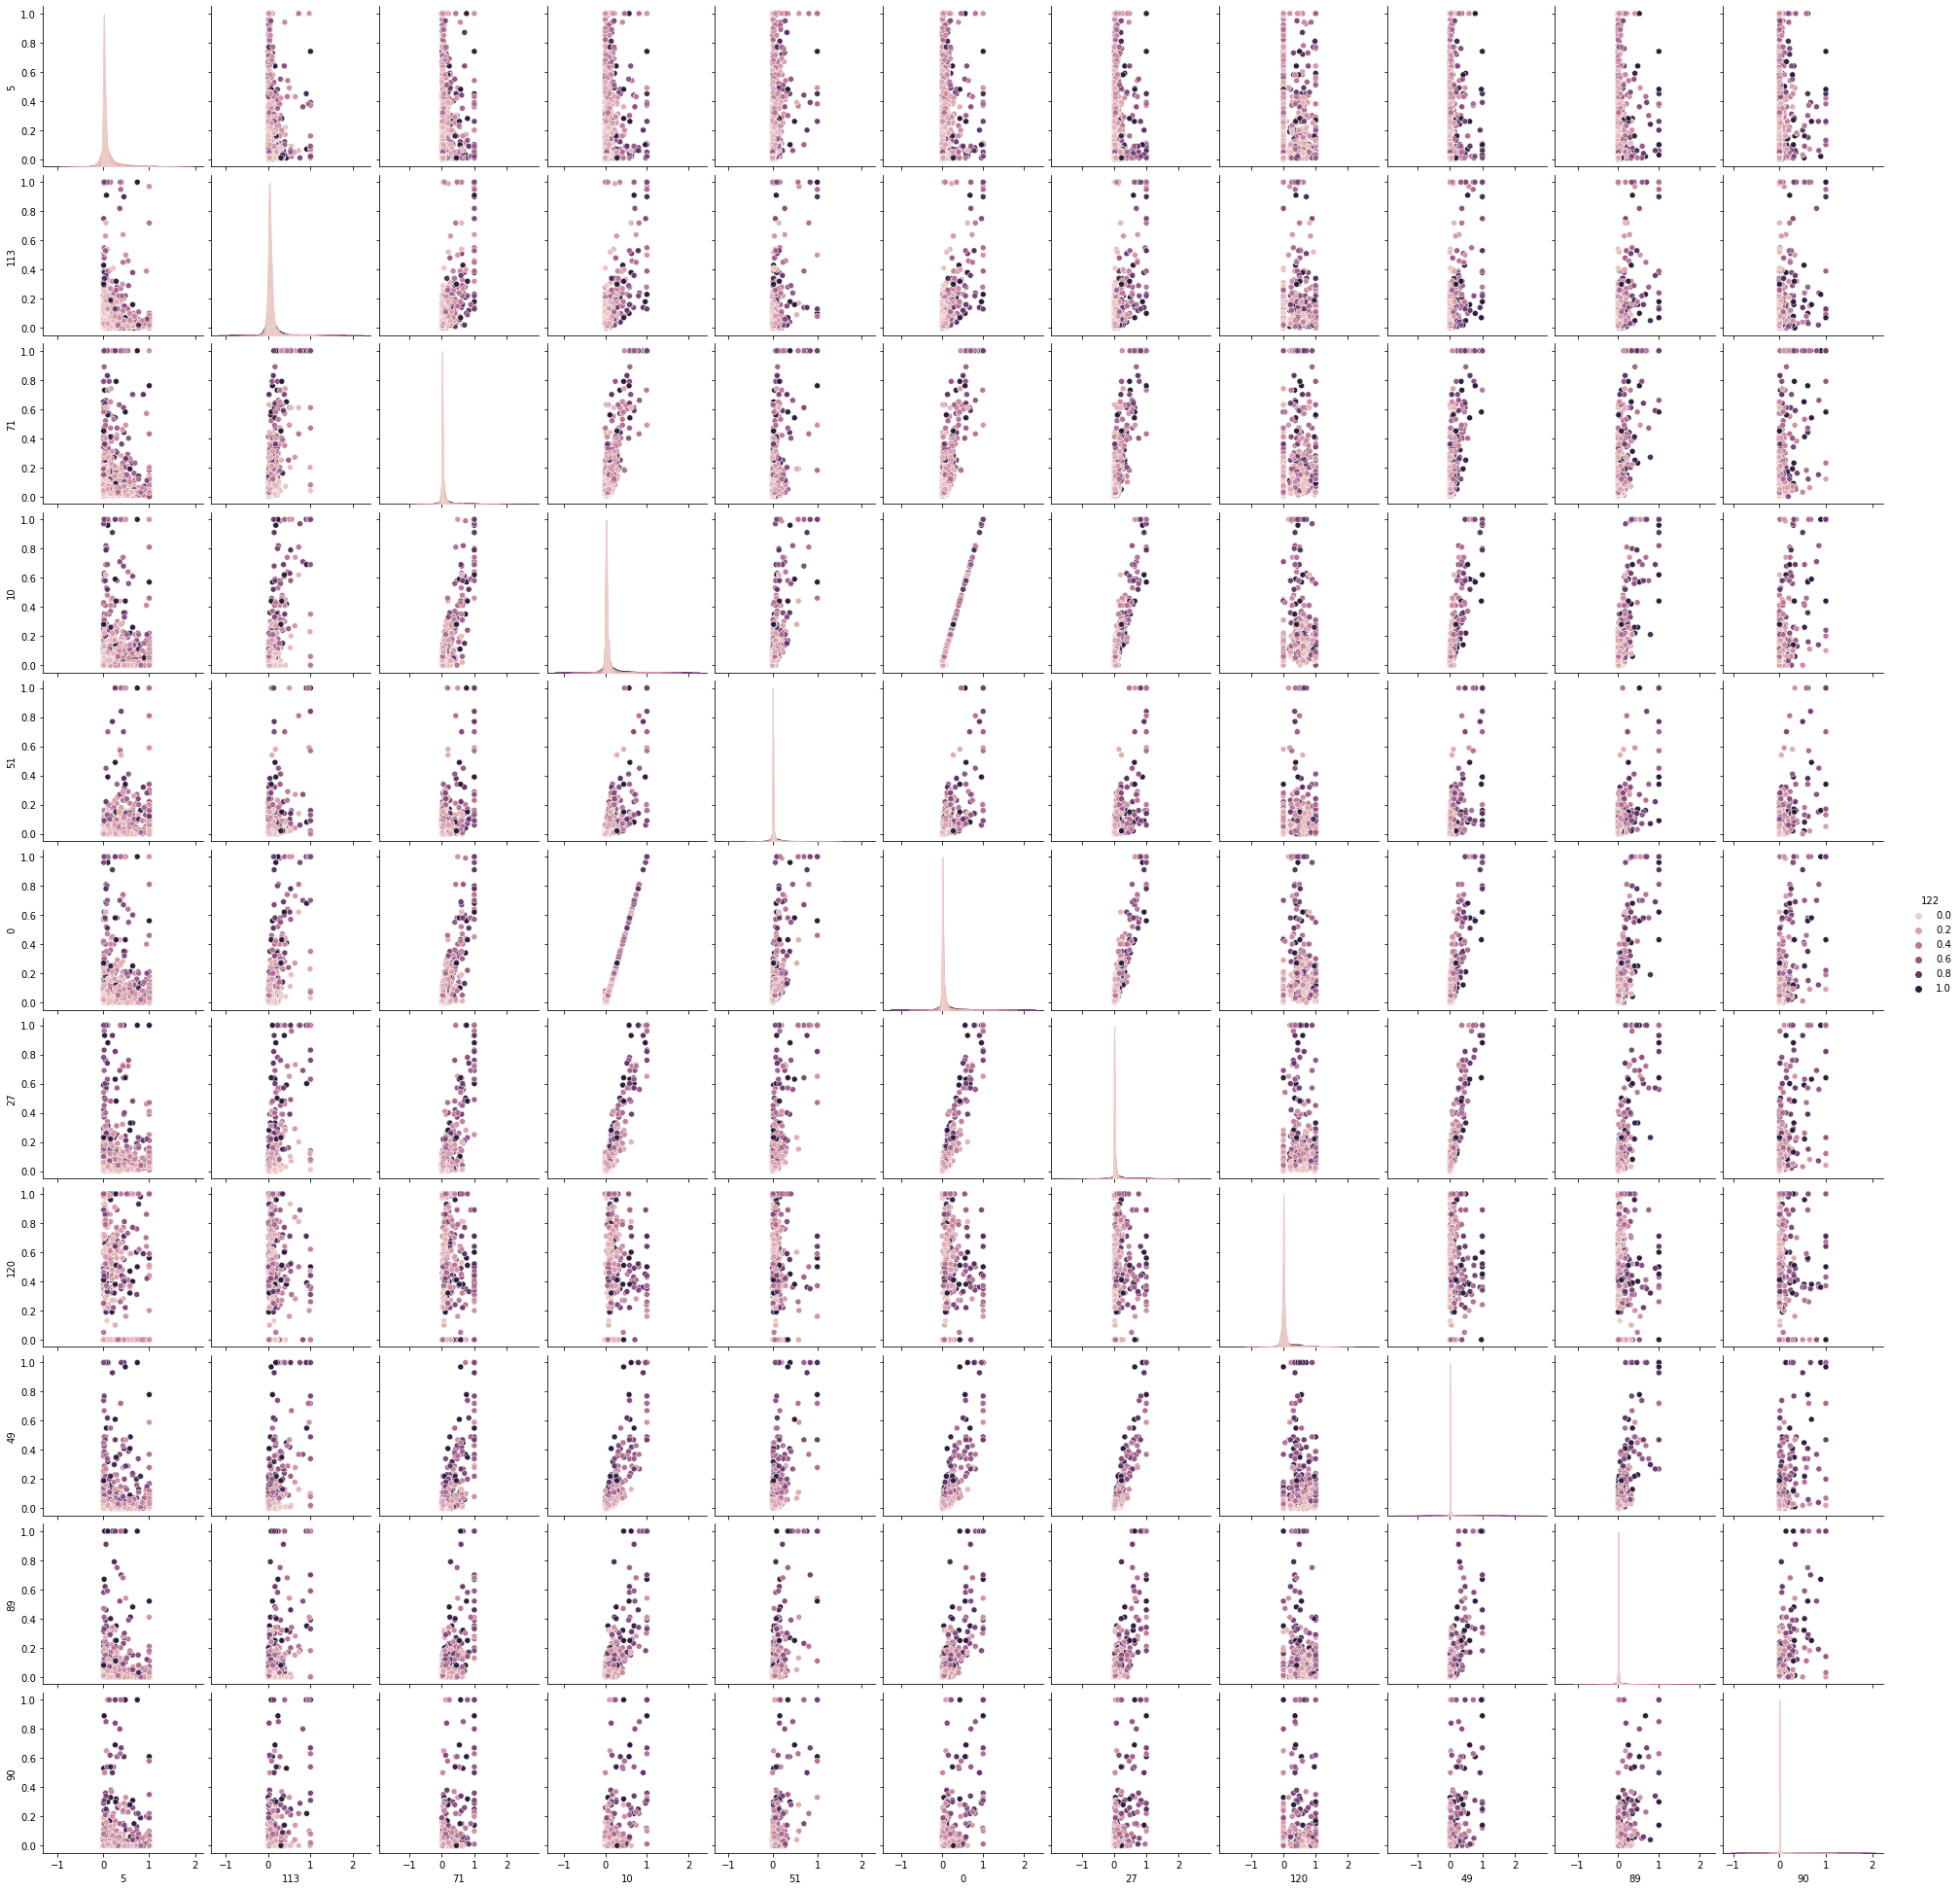

In [18]:
import warnings
warnings.filterwarnings("ignore")
sns.pairplot(cv_df, hue=122)

<AxesSubplot:xlabel='122', ylabel='5'>

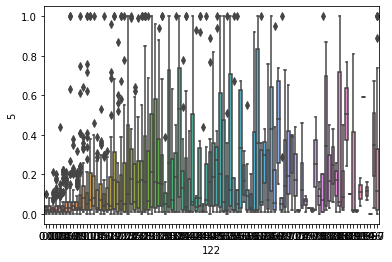

In [19]:
sns.boxplot(x=df[122], y=df[5])

<AxesSubplot:xlabel='122', ylabel='113'>

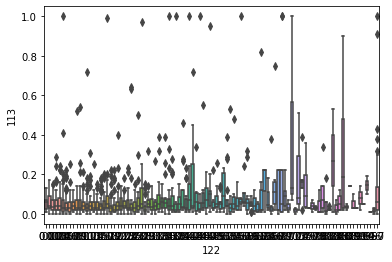

In [20]:
sns.boxplot(x=df[122], y=df[113])

<AxesSubplot:xlabel='122', ylabel='71'>

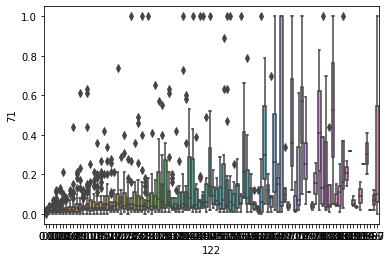

In [21]:
sns.boxplot(x=df[122], y=df[71])

<AxesSubplot:xlabel='122', ylabel='10'>

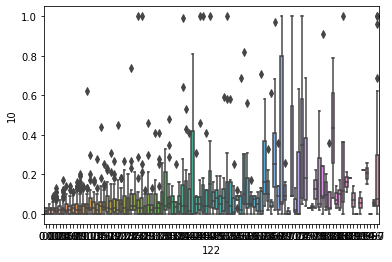

In [22]:
sns.boxplot(x=df[122], y=df[10])

<AxesSubplot:xlabel='122', ylabel='51'>

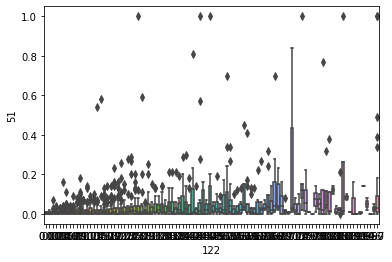

In [23]:
sns.boxplot(x=df[122], y=df[51])

<AxesSubplot:xlabel='122', ylabel='0'>

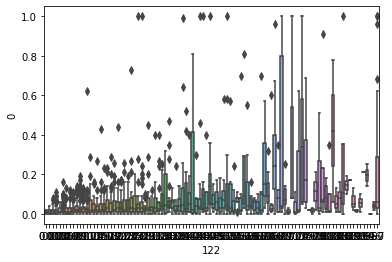

In [24]:
sns.boxplot(x=df[122], y=df[0])

<AxesSubplot:xlabel='122', ylabel='27'>

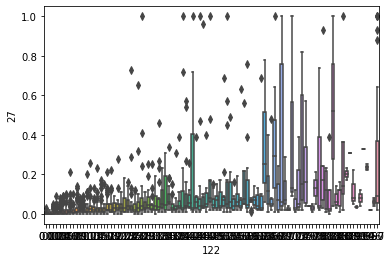

In [25]:
sns.boxplot(x=df[122], y=df[27])

<AxesSubplot:xlabel='122', ylabel='120'>

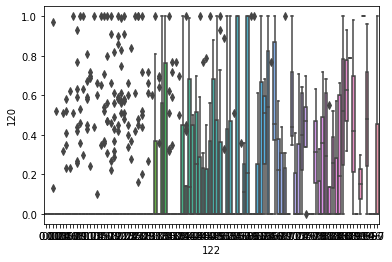

In [26]:
sns.boxplot(x=df[122], y=df[120])

<AxesSubplot:xlabel='122', ylabel='49'>

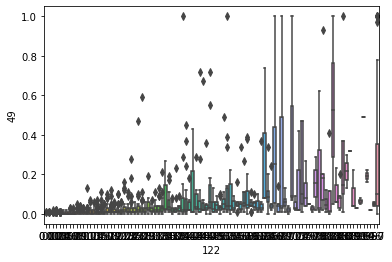

In [27]:
sns.boxplot(x=df[122], y=df[49])

<AxesSubplot:xlabel='122', ylabel='89'>

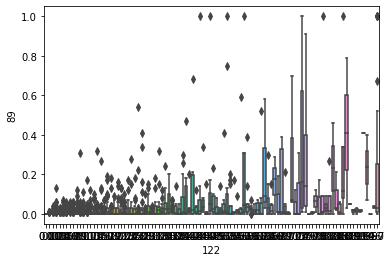

In [28]:
sns.boxplot(x=df[122], y=df[89])

<AxesSubplot:xlabel='122', ylabel='90'>

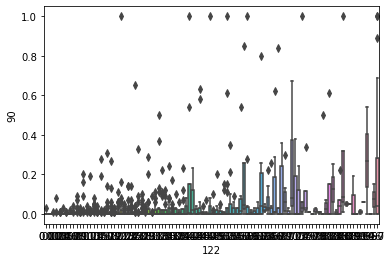

In [29]:
sns.boxplot(x=df[122], y=df[90])

# Question (2) (f)

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
reg_pred = reg.predict(X_test)
print("Test Error:", 1 - reg.score(X_test, y_test))

Test Error: 16.60646695085676


# Question (2) (f)

In [31]:
from sklearn.linear_model import RidgeCV
reg = RidgeCV(cv=5).fit(X_train, y_train)
reg_pred = reg.predict(X_test)
print("Test Error:", 1 - reg.score(X_test, y_test))

Test Error: 0.37297800429306305


# Question (2) (h)

In [32]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=5).fit(X_train, y_train)
reg_pred = reg.predict(X_test)
print("Test Error:", 1 - reg.score(X_test, y_test))
# requires scikit-learn version 1.0+
# print("Number of Features Selected:", reg.n_features_in)
# print("Features Selected:", reg.feature_names_in)

Test Error: 0.37352954982498165


In [33]:
reg = LassoCV(cv=5, normalize=1).fit(X_train, y_train)
reg_pred = reg.predict(X_test)
print("Test Error:", 1 - reg.score(X_test, y_test))
# requires scikit-learn version 1.0+
# print("Number of Features Selected:", reg.n_features_in)
# print("Features Selected:", reg.feature_names_in)

Test Error: 0.37396813412761454


# Question (2) (i)